# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from functools import reduce

# Reading Files

In [3]:
df1 = pd.read_excel("./charity_navigator_clean.xlsx")
population = pd.read_excel("./population.xlsx")
states = pd.read_excel("./us_states.xlsx")

In [4]:
a = df1['organization_type'].str.split(':', expand=True) # finding categories
df1[['category','organization_type2']] = a[[0,1]]
df1 = df1.merge(states,left_on=['state'], right_on=['State_abv'], how='left') # adding state id for google cloud api
df1

,accountability_score,administrative_expenses,charity_name,charity_url,city,cn_advisory,compensation_leader_compensation,compensation_leader_expense_percent,compensation_leader_title,excess_or_deficit_for_year,...,payments_to_affiliates,program_expenses,state,total_contributions,category,organization_type2,State_name_c,State_name,State_abv,State
0,89,164590,9to5 National Association of Working Women,https://www.charitynavigator.org/index.cfm?bay...,Milwaukee,NaN,53463,3.11,Executive Director,349718,...,0,1440463,WI,1999023.0,Human and Civil Rights,Advocacy and Education,WISCONSIN,Wisconsin,WI,55.0
1,86,1001560,'Aha Pūnana Leo,https://www.charitynavigator.org/index.cfm?bay...,Hilo,NaN,73500,1.47,Executive Director,1175965,...,0,3912270,HI,3339358.0,Education,Early Childhood Programs and Services,HAWAII,Hawaii,HI,15.0
2,85,93957,AID FOR AIDS International,https://www.charitynavigator.org/index.cfm?bay...,New York,NaN,85000,0.99,Executive Director,-461502,...,0,8157850,NY,8039138.0,International,Development and Relief Services,NEW YORK,New York,NY,36.0
3,86,346867,Futures in Education,https://www.charitynavigator.org/index.cfm?bay...,Brooklyn,NaN,61220,0.78,Acting Executive Director,1872733,...,0,7018262,NY,9704138.0,Education,"Scholarship and Financial Support ,",NEW YORK,New York,NY,36.0
4,97,135195,Every Generation Ministries,https://www.charitynavigator.org/index.cfm?bay...,Temecula,NaN,74244,5.41,President,-103940,...,0,1148407,CA,1234662.0,Religion,Religious Activities,CALIFORNIA,California,CA,6.0
5,100,505751,Futures Without Violence,https://www.charitynavigator.org/index.cfm?bay...,San Francisco,NaN,312498,2.85,President & Founder,1931497,...,0,10059539,CA,12355178.0,Human and Civil Rights,Advocacy and Education,CALIFORNIA,California,CA,6.0
6,89,103173,Gwinnett Habitat for Humanity,https://www.charitynavigator.org/index.cfm?bay...,Stone Mountain,NaN,85665,7.27,Executive Director,-126216,...,33556,1024283,GA,536485.0,Community Development,Housing and Neighborhood Development,GEORGIA,Georgia,GA,13.0
7,100,663845,Izaak Walton League of America,https://www.charitynavigator.org/index.cfm?bay...,Gaithersburg,NaN,154999,6.01,Executive Director,-294094,...,0,1695556,MD,2170503.0,Environment,Environmental Protection and Conservation,MARYLAND,Maryland,MD,24.0
8,100,77155,"It's The Journey, Inc.",https://www.charitynavigator.org/index.cfm?bay...,Atlanta,NaN,110110,7.36,Executive Director,107849,...,0,1340579,GA,1473462.0,Health,"Medical Research ,",GEORGIA,Georgia,GA,13.0
9,89,200643,Issaquah Schools Foundation,https://www.charitynavigator.org/index.cfm?bay...,Bellevue,NaN,98048,5.89,Executive Director,-59227,...,0,1225020,WA,1574828.0,Education,"Scholarship and Financial Support ,",WASHINGTON,Washington,WA,53.0


# Grouping by State and Category

In [73]:
df2 = df1.groupby(['State', 'State_name', 'State_abv', 'category'])[['excess_or_deficit_for_year', 'financial_score', 'net_assets', 'other_revenue', 'overall_score', 'payments_to_affiliates', 'program_expenses', 'total_contributions']].sum().reset_index()
df2['count'] = df1.groupby(['State', 'State_name', 'State_abv', 'category'])['charity_name'].count().reset_index(name='count')['count']
df_state = df1.groupby(['State', 'State_name', 'State_abv'])[['excess_or_deficit_for_year', 'financial_score', 'net_assets', 'other_revenue', 'overall_score', 'payments_to_affiliates', 'program_expenses', 'total_contributions']].sum().reset_index()
df_state['count'] = df1.groupby(['State', 'State_name', 'State_abv'])['charity_name'].count().reset_index(name='count')['count']
df_category = df1.groupby(['category'])[['excess_or_deficit_for_year', 'financial_score', 'net_assets', 'other_revenue', 'overall_score', 'payments_to_affiliates', 'program_expenses', 'total_contributions']].sum().reset_index()
df_category['count'] = df1.groupby(['category'])['charity_name'].count().reset_index(name='count')['count']
df3 = df2.merge(population, left_on=['State_abv'], right_on=['State_abv'], how='left') #add population
df_state = df_state.merge(population, left_on=['State_abv'], right_on=['State_abv'], how='left')
df_state

,State,State_name,State_abv,excess_or_deficit_for_year,financial_score,net_assets,other_revenue,overall_score,program_expenses,total_contributions,count,Population
0,1.0,Alabama,AL,42998177,4381.95,846562585,23519354,4391.95,339715352,3.841818e+08,52,4872725
1,2.0,Alaska,AK,-613973,1154.84,82522448,4454610,1168.79,51151017,4.969990e+07,14,746079
2,4.0,Arizona,AZ,155946584,9585.23,2334169026,77804050,9796.19,1321452819,1.421201e+09,111,7044577
3,5.0,Arkansas,AR,28202034,2092.28,429767136,7369386,1998.32,222513026,2.772744e+08,24,2998643
4,6.0,California,CA,626441341,74860.99,25940477909,1146214349,76106.44,11724567459,9.823032e+09,873,39506094
5,7.0,Colorado,CO,50773190,19190.39,2919611548,116461851,19466.00,2231351758,2.288257e+09,223,5632271
6,8.0,Connecticut,CT,466950592,9371.73,3041279466,96756727,9638.03,3143370609,3.598270e+09,111,3568174
7,9.0,Delaware,DE,3926130,1935.77,459522736,24230994,1958.99,119062284,9.361531e+07,22,960054
8,11.0,District of Columbia,DC,181944116,33357.30,17710680056,767824561,34037.05,9260310237,7.725919e+09,392,691963
9,12.0,Florida,FL,104987242,32669.00,14632187245,492293085,32915.78,4064839677,3.574520e+09,372,20979964


# Average and Per Capita Measures

In [74]:
df3['financial_score_average'] = df3['financial_score']/df3['count']
df3['overall_score_average'] = df3['overall_score']/df3['count']
df3['excess_or_deficit_for_year_percapita'] = df3['excess_or_deficit_for_year']/df3['Population']
df3['net_assets_percapita'] = df3['net_assets']/df3['Population']
df3['other_revenue_percapita'] = df3['other_revenue']/df3['Population']
df3['program_expenses_percapita'] = df3['program_expenses']/df3['Population']
df3['total_contributions_percapita'] = df3['total_contributions']/df3['Population']
df3

,State,State_name,State_abv,category,excess_or_deficit_for_year,financial_score,net_assets,other_revenue,overall_score,program_expenses,total_contributions,count,Population,financial_score_average,overall_score_average,excess_or_deficit_for_year_percapita,net_assets_percapita,other_revenue_percapita,program_expenses_percapita,total_contributions_percapita
0,1.0,Alabama,AL,Animals,2224968,92.15,29952464,1112240,94.44,8885630,7.884309e+06,1,4872725,92.150000,94.440000,0.456617,6.146964,0.228258,1.823544,1.618049
1,1.0,Alabama,AL,"Arts, Culture, Humanities",2326480,633.50,17900737,1836836,654.34,26343178,2.163676e+07,8,4872725,79.187500,81.792500,0.477449,3.673660,0.376963,5.406252,4.440383
2,1.0,Alabama,AL,Community Development,3682263,919.01,114839107,3814801,944.81,77250425,8.366962e+07,11,4872725,83.546364,85.891818,0.755689,23.567738,0.782889,15.853639,17.171011
3,1.0,Alabama,AL,Education,957175,290.41,11641152,403127,253.92,5903627,6.784419e+06,3,4872725,96.803333,84.640000,0.196435,2.389044,0.082731,1.211566,1.392325
4,1.0,Alabama,AL,Environment,7440415,90.95,18192084,248250,89.92,2712221,1.010315e+07,1,4872725,90.950000,89.920000,1.526952,3.733452,0.050947,0.556613,2.073409
5,1.0,Alabama,AL,Health,2902066,349.94,80047810,1759921,341.97,21047799,2.002292e+07,4,4872725,87.485000,85.492500,0.595574,16.427730,0.361178,4.319513,4.109183
6,1.0,Alabama,AL,Human Services,4256680,1216.33,164571472,4243229,1254.98,109967006,1.120665e+08,15,4872725,81.088667,83.665333,0.873573,33.774012,0.870812,22.567866,22.998725
7,1.0,Alabama,AL,Human and Civil Rights,15385331,167.84,336387753,7038993,173.55,31241771,5.447396e+07,2,4872725,83.920000,86.775000,3.157439,69.034832,1.444570,6.411560,11.179363
8,1.0,Alabama,AL,International,-327736,174.82,819390,649847,177.57,2673020,2.146822e+06,2,4872725,87.410000,88.785000,-0.067259,0.168158,0.133364,0.548568,0.440579
9,1.0,Alabama,AL,Religion,3892774,364.86,53104111,1925958,319.40,50990107,6.216091e+07,4,4872725,91.215000,79.850000,0.798891,10.898237,0.395253,10.464393,12.756909


# Creating a dataframe with contributions in different categories per state

In [145]:
df4 = df_state[['State_name', 'total_contributions_percapita']]
categories = df3['category'].unique().tolist()
df_cat0 = df3[df3['category'].str.match(categories[0])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Animals_contributions_percapita"})
df_cat1 = df3[df3['category'].str.match(categories[1])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Arts_contributions_percapita"})
df_cat2 = df3[df3['category'].str.match(categories[2])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Community_contributions_percapita"})
df_cat3 = df3[df3['category'].str.match(categories[3])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Education_contributions_percapita"})
df_cat4 = df3[df3['category'].str.match(categories[4])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Environment_contributions_percapita"})
df_cat5 = df3[df3['category'].str.match(categories[5])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Health_contributions_percapita"})
df_cat6 = df3[df3['category'].str.match(categories[6])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "HumanServices_contributions_percapita"})
df_cat7 = df3[df3['category'].str.match(categories[7])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "CivilRights_contributions_percapita"})
df_cat8 = df3[df3['category'].str.match(categories[8])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "International_contributions_percapita"})
df_cat9 = df3[df3['category'].str.match(categories[9])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Religion_contributions_percapita"})
df_cat10 = df3[df3['category'].str.match(categories[10])][['State_name','total_contributions_percapita']].rename(index=str, columns={"total_contributions_percapita": "Research_contributions_percapita"})
frames = [df4, df_cat0, df_cat1, df_cat2, df_cat3, df_cat4, df_cat5, df_cat6, df_cat7, df_cat8, df_cat9, df_cat10]
df_cat_contributions_all = reduce(lambda left,right: pd.merge(left,right,on='State_name',  how='outer'), frames)
df_cat_contributions_all

,State_name,total_contributions_percapita,Animals_contributions_percapita,Arts_contributions_percapita,Community_contributions_percapita,Education_contributions_percapita,Environment_contributions_percapita,Health_contributions_percapita,HumanServices_contributions_percapita,CivilRights_contributions_percapita,International_contributions_percapita,Religion_contributions_percapita,Research_contributions_percapita
0,Alabama,78.843308,1.618049,4.440383,17.171011,1.392325,2.073409,4.109183,22.998725,11.179363,0.440579,12.756909,0.663371
1,Alaska,66.614795,NaN,2.103434,9.573030,NaN,8.073058,NaN,42.657353,NaN,NaN,4.207920,NaN
2,Arizona,201.743999,5.488523,5.385679,36.635209,26.385628,4.367578,17.349695,67.392084,7.983179,18.396005,11.270922,1.089498
3,Arkansas,92.466626,NaN,1.764485,NaN,16.310654,NaN,0.205025,26.785046,NaN,38.570716,8.830700,NaN
4,California,248.645986,11.494944,31.165246,25.475018,11.392374,7.333789,27.970790,62.259764,6.678793,42.371825,10.219037,12.284408
5,Colorado,406.276136,13.037674,26.338908,22.563383,14.585926,14.819475,8.883655,90.336792,3.742076,176.367644,33.978981,1.621622
6,Connecticut,1008.434570,4.511168,19.259909,27.091240,12.985093,2.594155,35.348005,47.928742,3.192658,853.271559,1.894747,0.357295
7,Delaware,97.510459,3.587153,8.645379,24.222823,10.006211,4.649802,2.112218,44.286872,NaN,NaN,NaN,NaN
8,District of Columbia,11165.219796,809.204822,2874.703460,116.325023,533.786280,771.207556,458.266293,1905.242986,698.398082,1650.112554,102.940397,1245.032344
9,Florida,170.377802,4.530944,10.298592,27.708811,30.092577,1.581829,24.871310,51.260823,1.108808,15.464272,2.855531,0.604305


# Creating a dataframe with average score in different categories per state

In [146]:
df5 = df_state[['State_name', 'overall_score_average']]
categories = df3['category'].unique().tolist()
df_cat0 = df3[df3['category'].str.match(categories[0])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Animals_score_average"})
df_cat1 = df3[df3['category'].str.match(categories[1])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Arts_score_average"})
df_cat2 = df3[df3['category'].str.match(categories[2])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Community_score_average"})
df_cat3 = df3[df3['category'].str.match(categories[3])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Education_score_average"})
df_cat4 = df3[df3['category'].str.match(categories[4])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Environment_score_average"})
df_cat5 = df3[df3['category'].str.match(categories[5])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Health_score_average"})
df_cat6 = df3[df3['category'].str.match(categories[6])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "HumanServices_score_average"})
df_cat7 = df3[df3['category'].str.match(categories[7])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "CivilRights_score_average"})
df_cat8 = df3[df3['category'].str.match(categories[8])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "International_score_average"})
df_cat9 = df3[df3['category'].str.match(categories[9])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Religion_score_average"})
df_cat10 = df3[df3['category'].str.match(categories[10])][['State_name','overall_score_average']].rename(index=str, columns={"overall_score_average": "Research_score_average"})
frames = [df5, df_cat0, df_cat1, df_cat2, df_cat3, df_cat4, df_cat5, df_cat6, df_cat7, df_cat8, df_cat9, df_cat10]
df_cat_score_all = reduce(lambda left,right: pd.merge(left,right,on='State_name',  how='outer'), frames)
df_cat_score_all 

,State_name,overall_score_average,Animals_score_average,Arts_score_average,Community_score_average,Education_score_average,Environment_score_average,Health_score_average,HumanServices_score_average,CivilRights_score_average,International_score_average,Religion_score_average,Research_score_average
0,Alabama,84.460577,94.440000,81.792500,85.891818,84.640000,89.920000,85.492500,83.665333,86.775000,88.785000,79.850000,87.050000
1,Alaska,83.485000,NaN,89.860000,81.895000,NaN,77.236667,NaN,90.008333,NaN,NaN,71.690000,NaN
2,Arizona,88.253964,90.055000,84.315000,88.374000,89.588750,90.545000,87.241333,89.809722,88.190000,86.518333,83.150000,86.750000
3,Arkansas,83.263333,NaN,80.813333,NaN,85.950000,NaN,83.440000,83.816154,NaN,84.710000,82.434000,NaN
4,California,87.178053,88.937692,85.838380,88.242308,87.719697,86.198909,87.013407,88.413556,87.214694,88.480857,79.838750,85.855556
5,Colorado,87.291480,89.474167,84.916207,86.430769,87.607692,88.403500,86.608824,89.154697,89.432500,86.790909,83.734545,86.664000
6,Connecticut,86.829099,90.722000,86.000476,87.698750,84.197000,89.664000,87.682308,86.505517,78.300000,91.787143,77.836667,82.090000
7,Delaware,89.045000,84.346667,87.696000,89.847500,93.055000,90.970000,91.590000,89.901667,NaN,NaN,NaN,NaN
8,District of Columbia,86.829209,87.071818,84.492727,87.588333,88.244615,88.093947,87.472593,90.006591,86.312464,86.629000,76.111111,86.423043
9,Florida,88.483280,91.371212,87.733158,88.712083,90.216897,90.391250,86.507250,88.904257,84.810000,86.967857,78.914000,89.830000


In [75]:
df_state['financial_score_average'] = df_state['financial_score']/df_state['count']
df_state['overall_score_average'] = df_state['overall_score']/df_state['count']
df_state['excess_or_deficit_for_year_percapita'] = df_state['excess_or_deficit_for_year']/df_state['Population']
df_state['net_assets_percapita'] = df_state['net_assets']/df_state['Population']
df_state['other_revenue_percapita'] = df_state['other_revenue']/df_state['Population']
df_state['program_expenses_percapita'] = df_state['program_expenses']/df_state['Population']
df_state['total_contributions_percapita'] = df_state['total_contributions']/df_state['Population']

In [76]:
df_category['financial_score_average'] = df_category['financial_score']/df_category['count']
df_category['overall_score_average'] = df_category['overall_score']/df_category['count']
df_category

,category,excess_or_deficit_for_year,financial_score,net_assets,other_revenue,overall_score,program_expenses,total_contributions,count,financial_score_average,overall_score_average
0,Animals,426449027,36781.75,10516563241,429567668,37162.63,4109462980,3.508674e+09,419,87.784606,88.693628
1,"Arts, Culture, Humanities",1237233966,91412.80,57967691166,2034763717,92620.84,11487156016,1.016181e+10,1081,84.563182,85.680703
2,Community Development,1348392596,60388.74,44507521764,1528277232,62218.82,9716912106,1.017111e+10,707,85.415474,88.003989
3,Education,1011615604,47306.34,14821309090,370549737,48014.15,5302133097,5.849944e+09,551,85.855426,87.140018
4,Environment,381068161,31878.70,14392986417,290531244,32453.73,3279686695,3.544429e+09,367,86.862943,88.429782
5,Health,728245608,61613.04,34274174308,1493675426,63450.51,12451167141,1.126342e+10,733,84.055989,86.562769
6,Human Services,618423228,183476.27,32187919252,1662873248,185519.25,27514509484,2.295701e+10,2098,87.452941,88.426716
7,Human and Civil Rights,160685471,25011.66,2950712912,86557699,25380.48,1658193188,1.996389e+09,293,85.364027,86.622799
8,International,520809710,43276.34,13857818748,370796457,43967.83,18031046789,1.960151e+10,497,87.075131,88.466459
9,Religion,146142379,30527.40,3649978039,280583481,29679.60,2445432631,2.545977e+09,366,83.408197,81.091803


# Plots

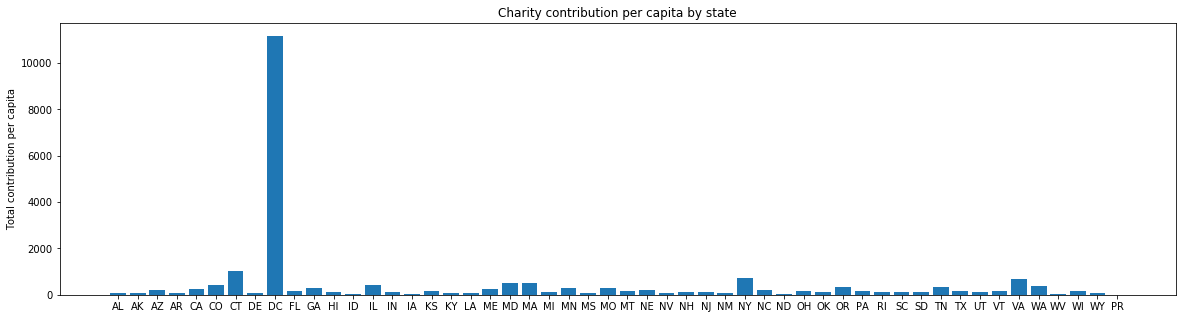

In [78]:
objects = df_state['State_abv'].tolist()
performance = df_state['total_contributions_percapita'].tolist()
y_locs = range(len(objects))

plt.rcParams["figure.figsize"] = [20,5]
plt.bar(y_locs, performance, align='center', alpha=1)
plt.xticks(y_locs, objects)
plt.ylabel('Total contribution per capita')
plt.title('Charity contribution per capita by state')

plt.show()

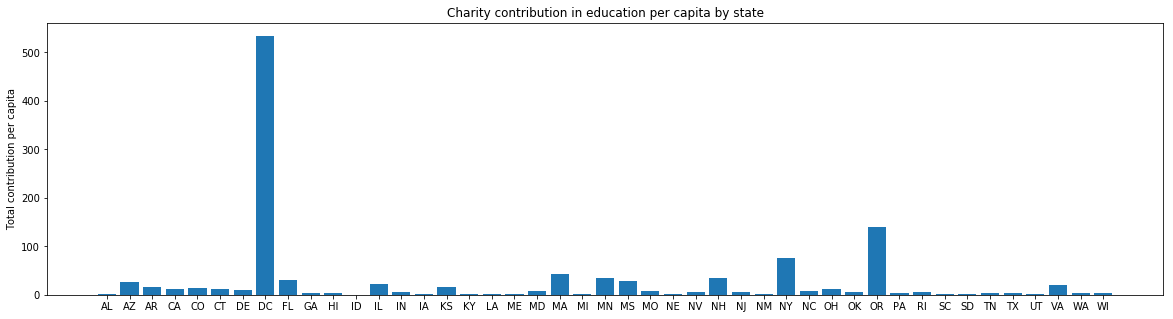

In [79]:
df_edu = df3[df3['category'].str.match('Education')].reset_index()
 
objects = df_edu['State_abv'].tolist()
performance = df_edu['total_contributions_percapita'].tolist()
y_locs = range(len(objects))

plt.rcParams["figure.figsize"] = [20,5]
plt.bar(y_locs, performance, align='center', alpha=1)
plt.xticks(y_locs, objects)
plt.ylabel('Total contribution per capita')
plt.title('Charity contribution in education per capita by state')


plt.show()

# Adding Need and Importance Factors

In [141]:
importance = pd.read_excel("./Education & Health values.xlsx")
importance['Education rank'] = importance['Expenditures for education per student'].rank(ascending=False)
importance = importance.merge(states,left_on=['State_abv'], right_on=['State_abv'], how='left')
importance = importance[['State_name', 'Education rank', 'Enviromental rank', 'Health Rank']]
importance

,State_name,Education rank,Enviromental rank,Health Rank
0,Alabama,39.0,46.0,47.0
1,Alaska,4.0,36.0,29.0
2,Arizona,49.0,28.0,31.0
3,Arkansas,35.0,41.0,48.0
4,California,31.0,9.0,17.0
5,Colorado,38.0,21.0,7.0
6,Connecticut,5.0,7.0,5.0
7,Delaware,13.0,19.0,30.0
8,District of Columbia,2.0,NaN,NaN
9,Florida,43.0,34.0,32.0


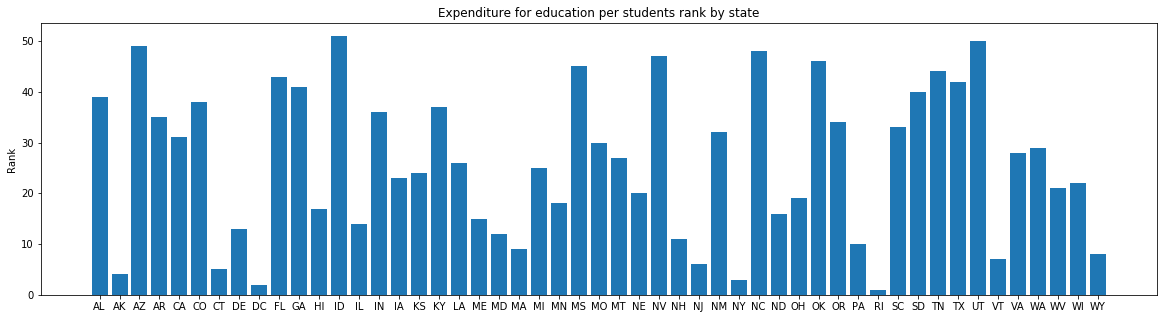

In [83]:
 
objects = importance['State_abv'].tolist()
performance = importance['Education rank'].tolist()
y_locs = range(len(objects))

plt.rcParams["figure.figsize"] = [20,5]
plt.bar(y_locs, performance, align='center', alpha=1)
plt.xticks(y_locs, objects)
plt.ylabel('Rank')
plt.title('Expenditure for education per students rank by state')


plt.show()

# Exporting Data

In [5]:
# saving
df1.to_csv('./All_Charities.csv', sep=',')

df_cat_contributions_all.to_csv('./Charity_Contributions_byState.csv', sep=',')
df_cat_score_all.to_csv('./Charity_Score_byState.csv', sep=',')

importance.to_csv('./Ranking.csv', sep=',')

NameError: name 'df_cat_contributions_all' is not defined